In [1]:
import json
import io
import os
import re
from collections import Counter
from datetime import datetime
from operator import itemgetter

import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from fasttext import FastText
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering
from sklearn.manifold import TSNE
from scipy.spatial.distance import euclidean
from scipy import cluster
from xgboost import XGBClassifier
from scipy.spatial import ConvexHull

In [3]:
ft_ru = FastText.load_model('../cc.ru.300.bin')

In [4]:
with io.open(os.path.join(os.getcwd(), 'data', 'habr-favorites.json'), encoding='utf-8') as fp:
    fav_data = json.load(fp)
    
with io.open(os.path.join(os.getcwd(), 'data', 'habr-top-ru.json'), encoding='utf-8') as fp:
    top_data = json.load(fp)    

In [5]:
data = []
link_set = set()

raw_data = fav_data[:]
raw_data.extend(top_data)

for post in raw_data:
    if post['link'] in link_set:
        continue
    link_set.add(post['link'])
    data.append(post)

In [7]:
df_v = pd.DataFrame(data)

In [8]:
df_vector = []
for idx, row in df_v.iterrows():
    df_vector.append(ft_ru.get_word_vector(row.article))
df_vector = pd.DataFrame(df_vector)

In [9]:
vector2 = TSNE(n_components=2, perplexity=3).fit_transform(df_vector.values)
df_vector = None
ft_ru = None

In [11]:
df_v['tsne_x'] = vector2[:, 0]
df_v['tsne_y'] = vector2[:, 1]

for c in ['x', 'y']:
    minc = df_v[f'tsne_{c}'].min()
    maxc = df_v[f'tsne_{c}'].max()
    df_v[f'{c}'] = (df_v[f'tsne_{c}'] - minc) / (maxc - minc)

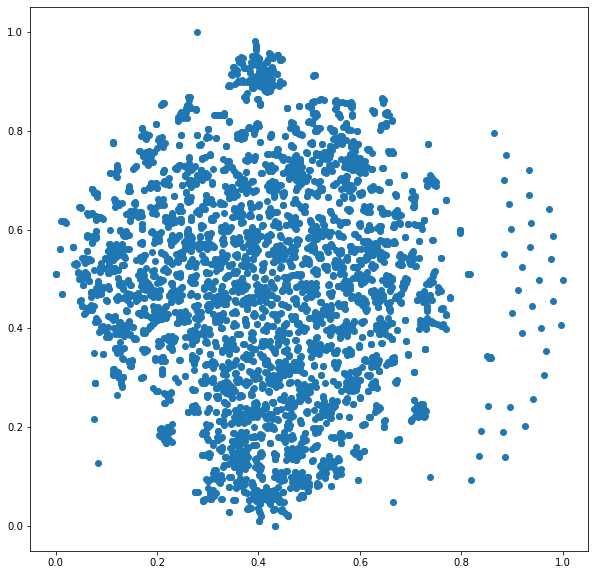

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)
plt.show()